### **자연어(텍스트) 데이터 전처리:  nltk(natural laguage toolkit)**

![%EC%A0%84%EC%B2%98%EB%A6%AC.PNG](attachment:%EC%A0%84%EC%B2%98%EB%A6%AC.PNG)

* **말뭉치 또는 코퍼스(영어: corpus, 복수형: corpora)**는 자연어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합
* 코퍼스에서 **토큰(token)**이라 불리는 단위로 나누는 작업을 **토큰화(tokenization)**라고 함
 - 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의함
 - 토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 함. 
 - 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주함.
* 표제어 추출(Lemmatization): 표제어(Lemmatizer)는 한글로는 '기본 사전형 단어' 정도의 의미로, 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단하기 위함. 
 - am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있음. 이때, 이 단어들의 표제어는 be.
 - dogs의 단수형은 dog

### **정규 표현식(Regular Expression; Regex)**
*    **특정한 규칙을 가진 문자열의 집합을 표현하는 데 사용하는 형식 언어**
*   자연어 데이터 정제를 위해 사용
*   정규 표현식에서 사용하는 메타 문자(meta characters)에는 다음과 같은 것이 있다.<br> ※ 메타 문자란 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용하는 문자를 말한다. <br>

<b>메타문자: . ^ $ * + ? { } [ ] \ | ( )
*   **[  ]** : **문자 클래스**([ ])
*    &#45; : 하이픈(-)을 사용하면 두 문자 사이의 범위(From - To)를 의미
*    &#43; : 1번 이상 반복<br>
※   문자 클래스([ ]) 안에는 어떤 문자나 메타 문자도 사용할수 있지만 주의해야 할 메타 문자가 1가지 있다. 그것은 바로 ^인데, **문자 클래스([ ]) 안에 ^ 메타 문자를 사용할 경우에는 반대(not)라는 의미**를 갖는다. 

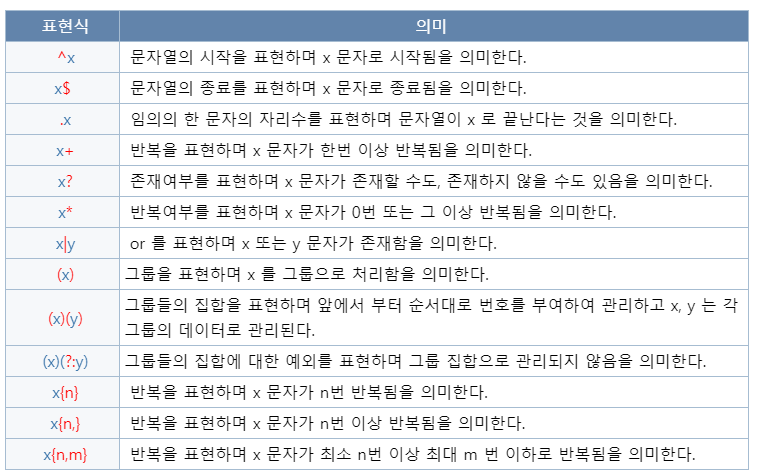

*  [abck] : a or b or c or k
*  [a-d] : -와 함께 사용되면 해당 문자 사이의 범위에 속하는 문자 중 하나
*  [0-9] : 모든 숫자
*  [a-z] : 모든 소문자
*  [A-Z] : 모든 대문자
*  [a-zA-Z0-9] : 모든 알파벳 문자 및 숫자
*  [^0-9] : ^가 맨 앞에 사용 되는 경우 해당 문자 패턴이 아닌 것과 매칭

### 1. 텍스트 데이터 정제(cleaning)
 
 **import re**<br>
 **re.sub（정규 표현식, 대상 문자열 , 치환 문자)**

*   정규 표현식: 검색 패턴을 지정
*   대상 문자열: 검색 대상이 되는 문자열(변경할 내용)
*   치환 문자열: 변경하고 싶은 문자열(원본)

In [ ]:
import re

In [ ]:
text = "I like an     $$ %& / apple"
text_mod = re.sub('[^a-zA-Z]+', ' ', text)
text_mod

'I like an apple'

※ 비식별화

In [ ]:
text = "010-1234-5678 Kim"

text_mod = re.sub('^[0-9]{3}-[0-9]{4}-[0-9]{4}', '***-****-****', text)
text_mod

'***-****-**** Kim'

### 2. nltk(Natural Language Toolkit)
**1)  토큰화<br>**
**2)  불용어(stopwords) 제거: 분석에 큰 의미가 없는 단어를 지칭. 예를 들어 the, a, an, is, I, my 등과 같이 문장을 구성하는 필수 요소지만 문맥적으로 큰 의미가 없는 단어가 이에 속함.<br>**
**3)  표제어(Lemmatizer) 추출: 어간(stem) + 접사(affix)**

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') #Open Multilingual Wordnet
#nltk.download('all')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parkj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parkj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parkj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\parkj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**정제: 정규표현식**

In [ ]:
reWords = re.sub('[^a-zA-Z]+', ' ', 'I will make my            deep learning systems' )
reWords

'I will make my deep learning systems'

**1) 토큰화**

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
lreWords = reWords.lower()
reWordsToken = word_tokenize(lreWords)
reWordsToken

['i', 'will', 'make', 'my', 'deep', 'learning', 'systems']

**2) 불용어(stopwords) 제거**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sWords = stopwords.words('English')

![sc.PNG](attachment:sc.PNG)

In [ ]:
reWordsTokenStop = [n for n in reWordsToken if n not in sWords ]
reWordsTokenStop

['make', 'deep', 'learning', 'systems']

**3) 표제어 추출**

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
reWordsTokenStopLemma = [lemma.lemmatize(w) for w in reWordsTokenStop ]
reWordsTokenStopLemma

['make', 'deep', 'learning', 'system']

### **람다(lambda)식, 람다 함수**
* 익명 함수(Anonymous functions)를 지칭하는 용어

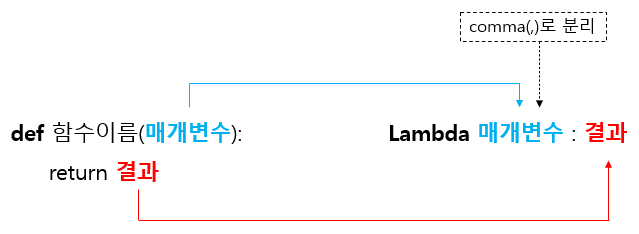

In [ ]:
def add(x, y):
    return x+y

In [ ]:
add(10, 20) 

30

In [ ]:
f = lambda x, y: x+y
f([10], [20])

[10, 20]

In [ ]:
(lambda x, y: x+y)(10, 20)

30

In [ ]:
[ 'hi', 'hello', 'hi', 'computer', 'machine', 'learning']

* **차원 축소: reduce()**

In [ ]:
from functools import reduce
words = reduce(lambda x, y : x+y, [['hi'], ['hi', 'computer'], ['learning']])
words

['hi', 'hi', 'computer', 'learning']

In [ ]:
words.count('hi')

2

In [ ]:
from collections import Counter
Counter(words)

Counter({'hi': 2, 'computer': 1, 'learning': 1})

### (실전 예제) **텍스트 빈도 분석**
*  데이터셋: http://www.riss.kr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
import re

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
from functools import reduce
from collections import Counter

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
file_path ='./dataset/myCabinetExcelData*.xls'

all_files = glob.glob(file_path)
all_files

In [ ]:
!pip install xlrd==1.2.0

In [ ]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

In [ ]:
all_files_data[0]

In [ ]:
all_files_data_concat = pd.concat(all_files_data, ignore_index=True)
all_files_data_concat

In [ ]:
all_titles = all_files_data_concat['제목']
all_titles[1]

In [ ]:
sWords = stopwords.words('english')
lemma = WordNetLemmatizer()

words = []
for title in all_titles:
    reWords = re.sub('[^a-zA-Z]+', ' ', title) # 정규식표현
    reWordsToken = word_tokenize(reWords.lower()) # 토큰화
    reWordsTokenStop = [n for n in reWordsToken if n not in sWords] #불용어 삭제
    reWordsTokenStopLemma = [lemma.lemmatize(w) for w in reWordsTokenStop] #표제어 추출
    words.append(reWordsTokenStopLemma)

In [ ]:
words

**차원 축소**

In [ ]:
words2 = reduce(lambda x, y:x+y, words)
words2

In [ ]:
from collections import Counter
count = Counter(words2)
count

In [ ]:
count.most_common(50)

In [ ]:
word_count = dict()

for tag, counts in count.most_common(50):
    word_count[tag] = counts
    #print("%s : %d" %(tag, counts))

In [ ]:
fkeys = word_count.keys()
fkeys

In [ ]:
fvalues = word_count.values()
fvalues

In [ ]:
len(word_count)

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(word_count)), fvalues, align = 'center')
plt.xticks(range(len(word_count)), list(fkeys), rotation = '85')

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color="white", width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(10,10))
plt.imshow(cloud)